In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.decomposition import PCA
import numpy as np

pd.set_option('display.max_columns', None)

%matplotlib inline


In [ ]:
data_df = pd.read_csv('final_data.csv')

classes = ['scout', 'soldier', 'pyro', 'demoman','heavy', 'engineer', 'medic', 'sniper', 'spy']
item_slots = ['headgear','misc','taunt','weapon']

not_accepted_df = data_df[data_df['accepted']==0]
accepted_df = data_df[data_df['accepted']==1]

data_df.head()

In [ ]:
sns.histplot(data=data_df,x='class_count',hue='accepted')

In [ ]:
fig,axes = plt.subplots(1,2,facecolor='white',figsize=(10,5))

not_accepted_df['class_count'].value_counts().plot(kind='pie',ax=axes[0],title='not accepted')
accepted_df['class_count'].value_counts().plot(kind='pie',ax=axes[1],title='accepted')

In [ ]:
fig,axes = plt.subplots(1,2,facecolor='white',figsize=(10,5))

not_accepted_df['certified_compatible'].value_counts().plot(kind='pie',ax=axes[0],title='not accepted')
accepted_df['certified_compatible'].value_counts().plot(kind='pie',ax=axes[1],title='accepted')

In [ ]:
sns.lmplot( data=data_df,x="featured_collection_count", y="favorites_count", col="accepted")

In [ ]:
sns.lmplot( data=data_df,x="comments_count", y="discussions_count", col="accepted")

In [ ]:
sns.lmplot(data=data_df,x="comments_count", y="visitors_count", col="accepted")

In [ ]:
sns.violinplot(data=data_df,x='accepted',y='screenshot_count')

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))

accepted_class_corr =accepted_df[[f'class_{c}' for c in classes]].corr()
not_accepted_class_corr =not_accepted_df[[f'class_{c}' for c in classes]].corr()


sns.heatmap(not_accepted_class_corr,ax=axes[0])
sns.heatmap(accepted_class_corr,ax=axes[1])
sns.heatmap(accepted_class_corr-not_accepted_class_corr,ax=axes[2])

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))

accepted_item_slot_corr =accepted_df[[f'item_slot_{s}' for s in item_slots]].corr()
not_accepted_item_slot_corr =not_accepted_df[[f'item_slot_{s}' for s in item_slots]].corr()


sns.heatmap(not_accepted_item_slot_corr,ax=axes[0])
sns.heatmap(accepted_item_slot_corr,ax=axes[1])
sns.heatmap(accepted_item_slot_corr-not_accepted_item_slot_corr,ax=axes[2])

In [ ]:
fig,axes = plt.subplots(1,3,facecolor='white',figsize=(15,5))

not_accepted_df['is_medal'].value_counts().plot(kind='pie',ax=axes[0],title='not accepted')
accepted_df['is_medal'].value_counts().plot(kind='pie',ax=axes[1],title='accepted')

pd.concat([accepted_df[accepted_df['is_medal'] == 1],not_accepted_df[not_accepted_df['is_medal'] == 1]])['accepted'].value_counts().plot(kind='pie',ax=axes[2],title='is_medal',colors=['green','red'])

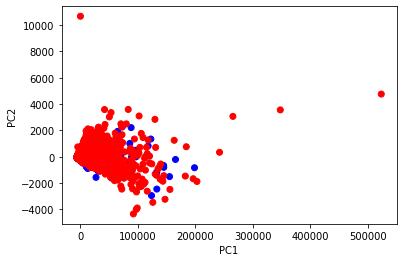

In [36]:
dataset = data_df.loc[:,['featured_collection_count', 'favorites_count', 'comments_count', 'discussions_count', 'visitors_count', 'screenshot_count','movie_count']]

pca2 = PCA(n_components=2)
pcComponents = pca2.fit_transform(dataset)
principal_df = pd.DataFrame(data = pcComponents, columns = ['principal component 1', 'principal component 2'])

final_df = pd.concat([principal_df, data_df[['accepted']]], axis = 1)

fig = plt.figure()
ax = plt.axes()
colormap = np.array(['r', 'b'])
ax.scatter(final_df['principal component 1'], final_df['principal component 2'], c=colormap[final_df.accepted])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

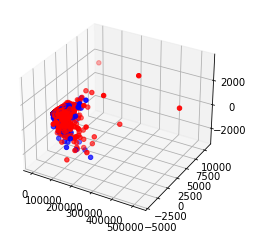

In [39]:
dataset = data_df.loc[:,['featured_collection_count', 'favorites_count', 'comments_count', 'discussions_count', 'visitors_count', 'screenshot_count','movie_count']]

pca2 = PCA(n_components=3)
pcComponents = pca2.fit_transform(dataset)
principal_df = pd.DataFrame(data = pcComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

final_df = pd.concat([principal_df, data_df[['accepted']]], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colormap = np.array(['r', 'b','g'])

ax.scatter(final_df['principal component 1'], final_df['principal component 2'], final_df['principal component 3'], c=colormap[final_df.accepted])
plt.show()